## Wine_Quality_Prediction

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("winequalityN_datasets.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.shape

(6497, 13)

In [4]:
# 'type' column is not required for the prediction...
data.drop(columns = 'type', inplace=True)

### EDA

In [5]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


<AxesSubplot:>

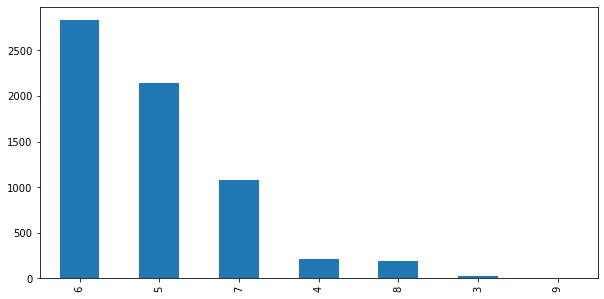

In [6]:
print(data['quality'].value_counts())
plt.figure(figsize=(10,5))
data['quality'].value_counts().plot(kind='bar')




<AxesSubplot:xlabel='quality', ylabel='alcohol'>

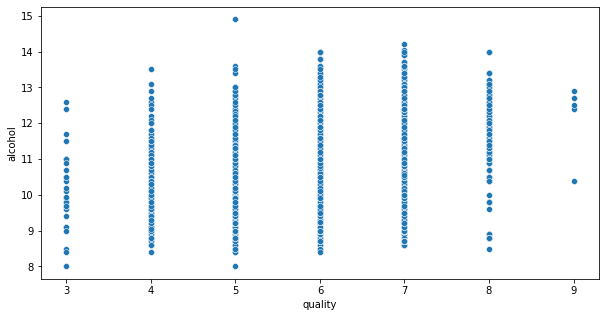

In [7]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x=data['quality'], y=data['alcohol'])

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='sulphates'>

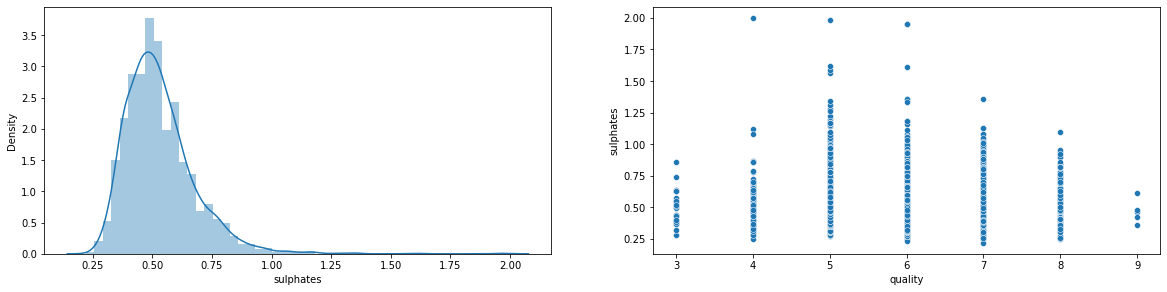

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['sulphates'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['sulphates'])

#looks like there are some outliears

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

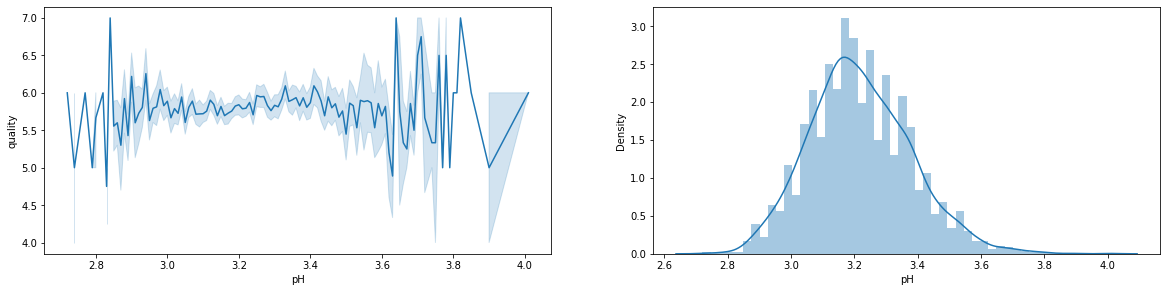

In [9]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(data=data, x=data['pH'], y=data['quality'])

plt.subplot(2,2,2)
sns.distplot(data['pH'])

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

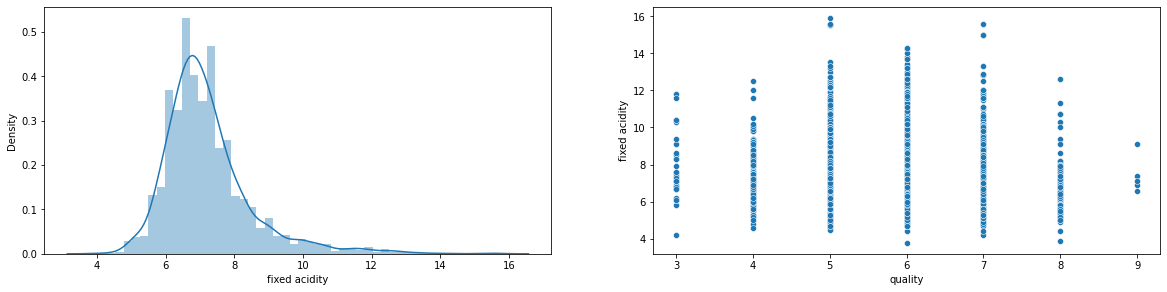

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['fixed acidity'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['fixed acidity'])


D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

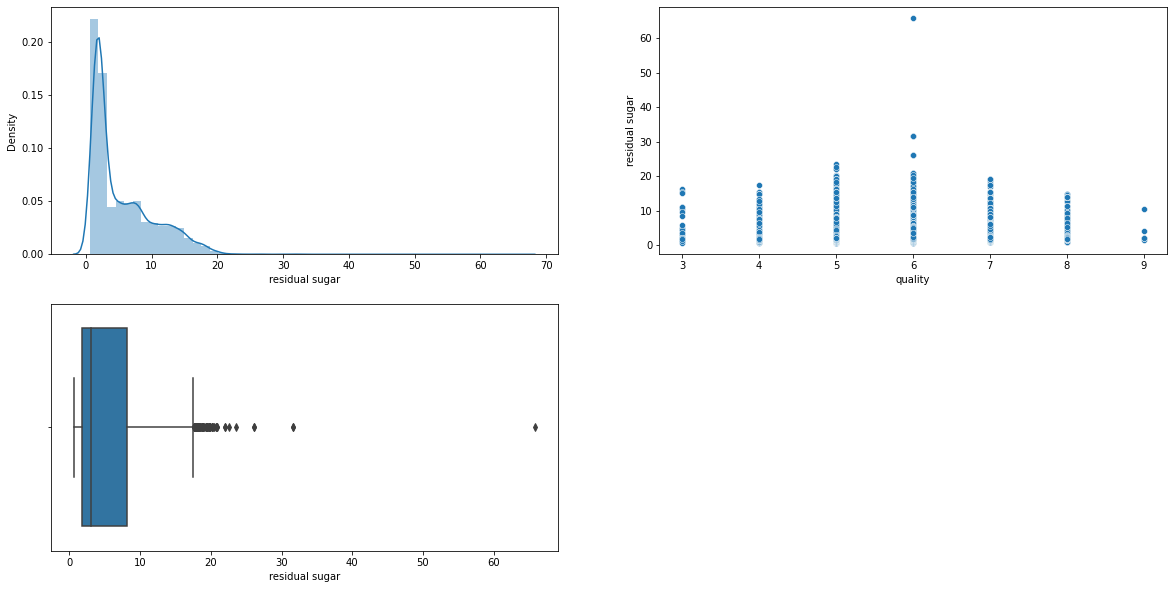

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['residual sugar'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['residual sugar'])


# outlier can be detected
plt.subplot(2,2,3)
sns.boxplot(data['residual sugar'])

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chlorides'>

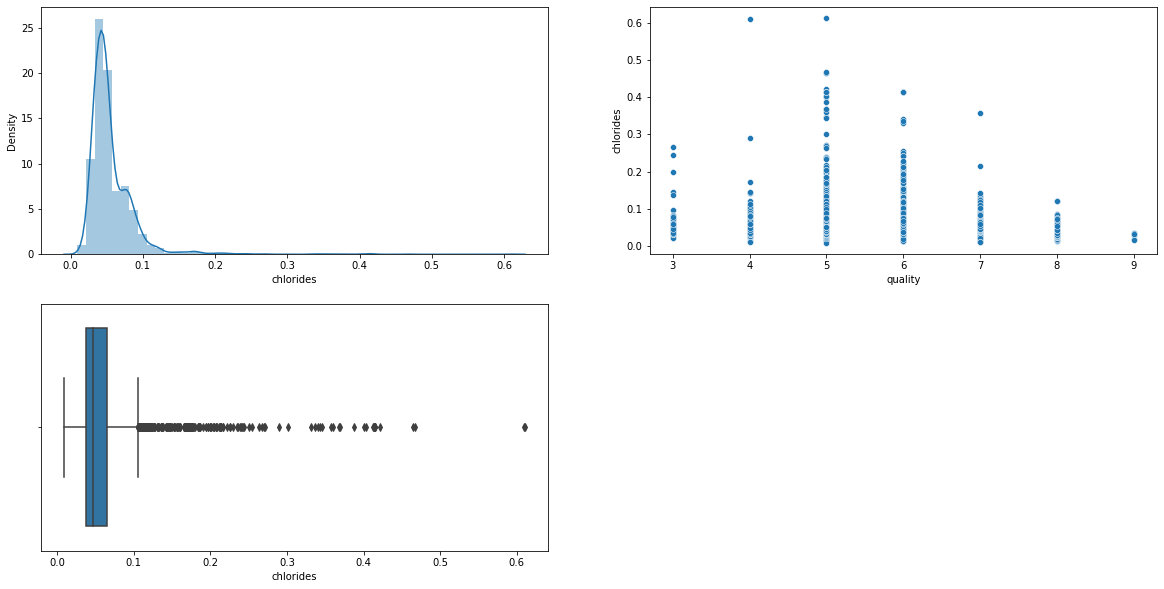

In [12]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['chlorides'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['chlorides'])

plt.subplot(2,2,3)
sns.boxplot(data['chlorides'])

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total sulfur dioxide'>

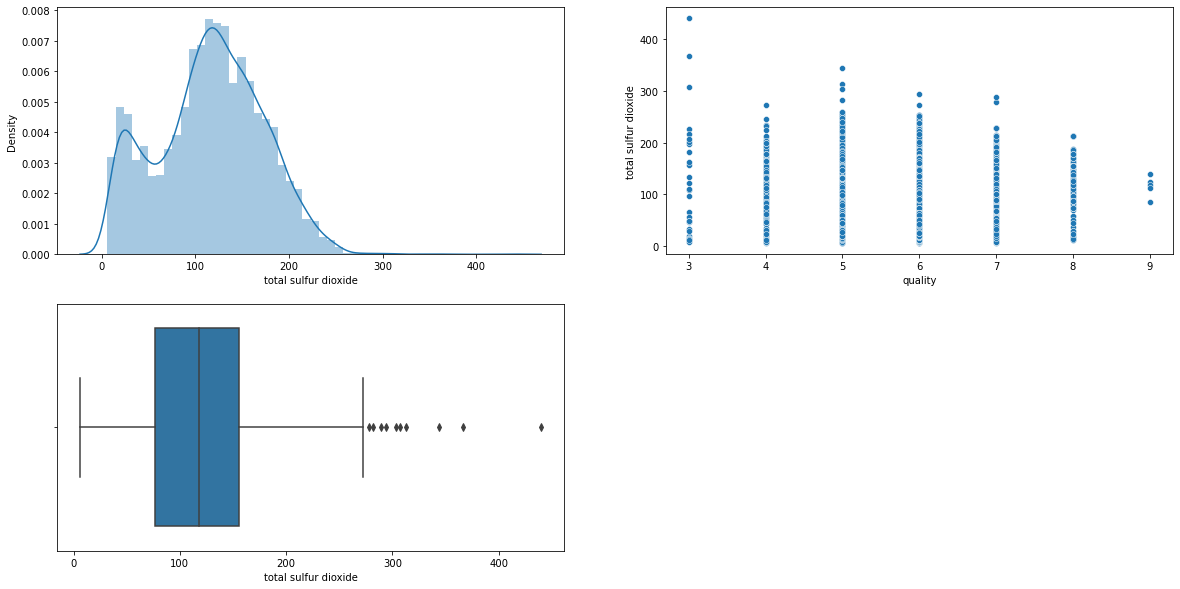

In [13]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['total sulfur dioxide'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['total sulfur dioxide'])

plt.subplot(2,2,3)
sns.boxplot(data['total sulfur dioxide'])

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='volatile acidity'>

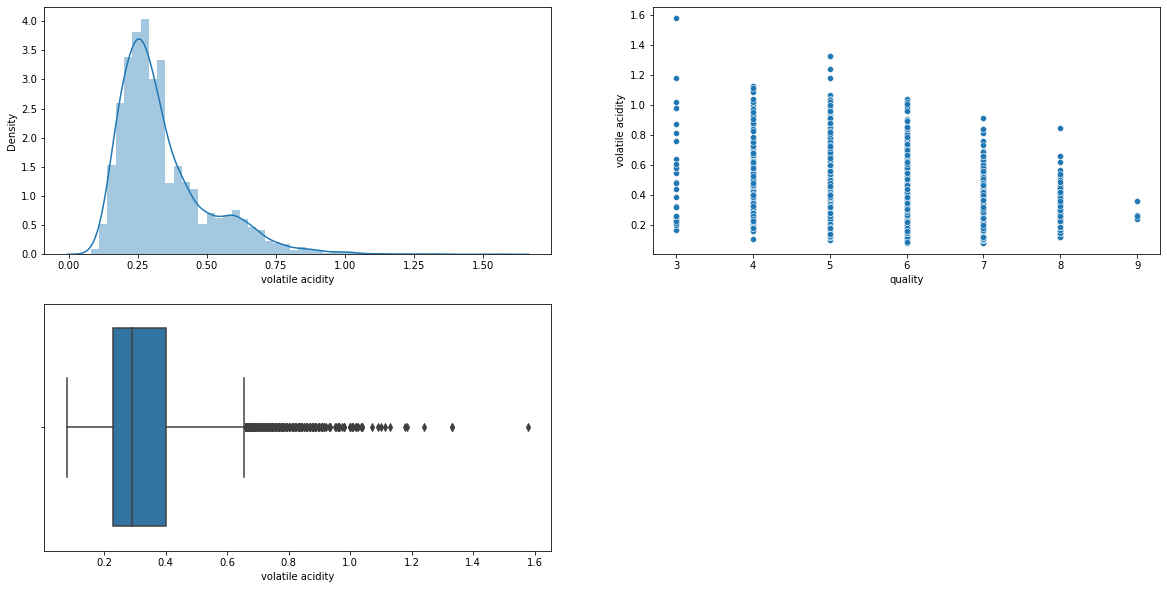

In [14]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['volatile acidity'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['volatile acidity'])

plt.subplot(2,2,3)
sns.boxplot(data['volatile acidity'])

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='citric acid'>

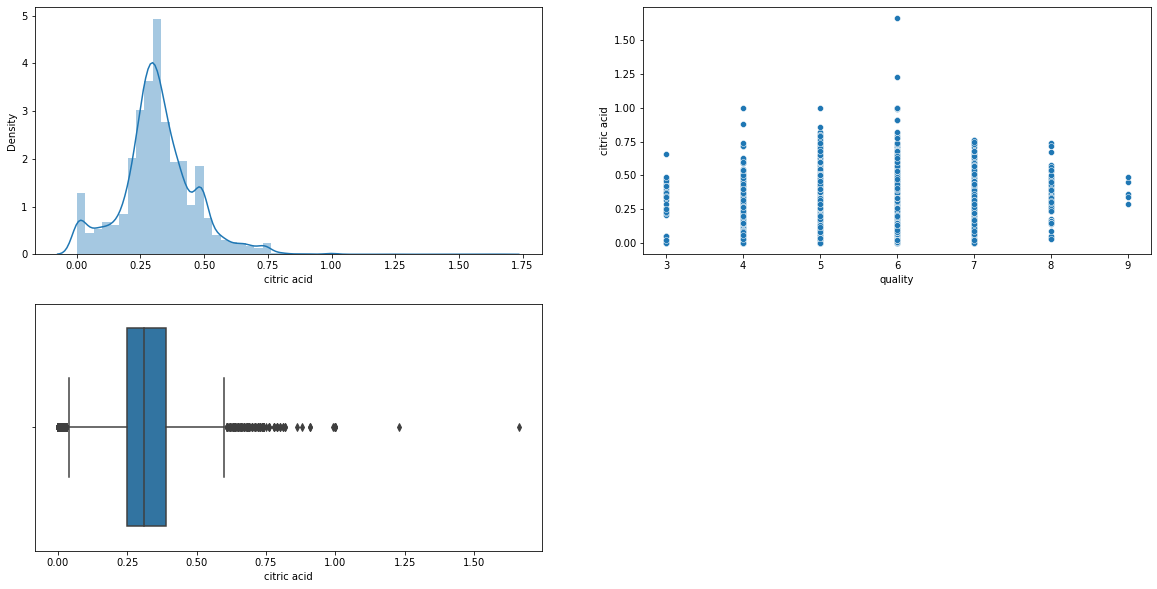

In [15]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['citric acid'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['citric acid'])

plt.subplot(2,2,3)
sns.boxplot(data['citric acid'])

D:\Bootcamp\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Bootcamp\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='free sulfur dioxide'>

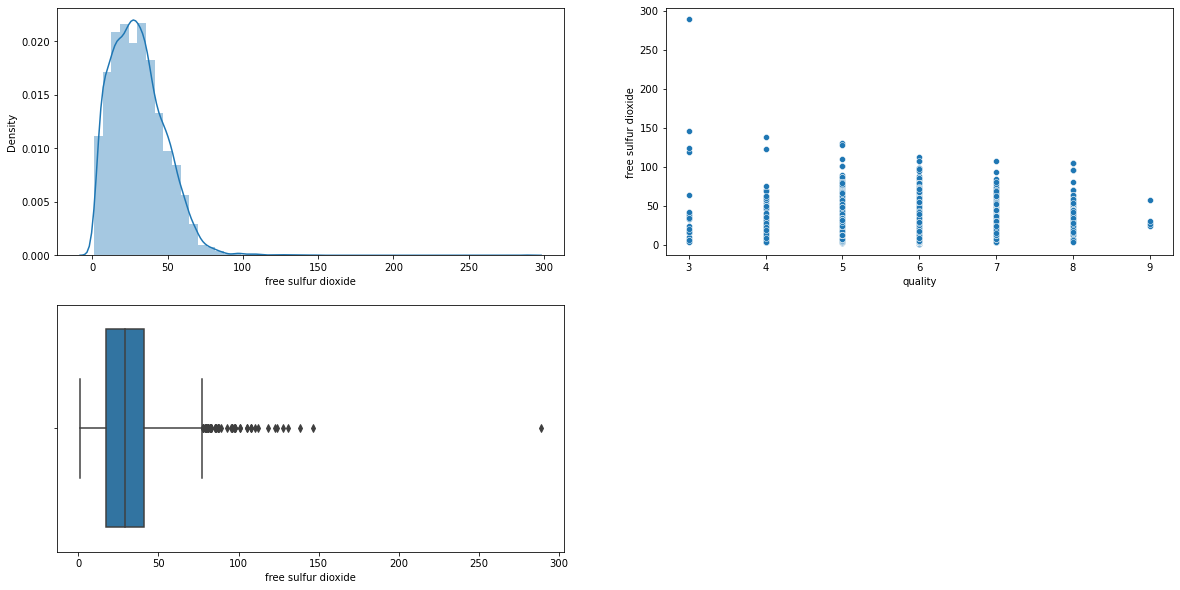

In [16]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.distplot(data['free sulfur dioxide'])

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['quality'], y=data['free sulfur dioxide'])

plt.subplot(2,2,3)
sns.boxplot(data['free sulfur dioxide'])

### Outlier Remove

In [17]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [18]:
# residual sugar

data = data.drop(data[data['residual sugar'] > 21].index)

In [19]:
# citric acid	

data = data.drop(data[data['citric acid'] > 1].index)

In [20]:
# chlorides

data = data.drop(data[data['chlorides'] > 0.5].index)

In [21]:
# free sulfur dioxide

data = data.drop(data[data['free sulfur dioxide'] > 200].index)


In [22]:
# total sulfur dioxide

data = data.drop(data[data['total sulfur dioxide'] > 300].index)

In [23]:
# sulphates

data = data.drop(data[data['sulphates'] > 1.75].index)

In [24]:
# volatile acidity

data = data.drop(data[data['volatile acidity'] > 1.25].index)


### Data Cleaning

In [25]:
data.isnull().sum()

fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [26]:
# some columns have missing values so replace the Nan values with the mean

In [27]:
data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace=True)

data['citric acid'].fillna(data['citric acid'].mean(), inplace=True)

data['residual sugar'].fillna(data['residual sugar'].mean(), inplace=True)


In [28]:
data['pH'].fillna(data['pH'].mean(), inplace=True)

data['volatile acidity'].fillna(data['volatile acidity'].mean(), inplace=True)

data['sulphates'].fillna(data['sulphates'].mean(), inplace=True)

data['chlorides'].fillna(data['chlorides'].mean(), inplace=True)


In [29]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [30]:
data.duplicated().sum()

1166

In [31]:
# there are so many duplicate rows so will drop this all rows

data = data.drop_duplicates(inplace=False)

In [32]:
data.shape

(5306, 12)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5306 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5306 non-null   float64
 1   volatile acidity      5306 non-null   float64
 2   citric acid           5306 non-null   float64
 3   residual sugar        5306 non-null   float64
 4   chlorides             5306 non-null   float64
 5   free sulfur dioxide   5306 non-null   float64
 6   total sulfur dioxide  5306 non-null   float64
 7   density               5306 non-null   float64
 8   pH                    5306 non-null   float64
 9   sulphates             5306 non-null   float64
 10  alcohol               5306 non-null   float64
 11  quality               5306 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 538.9 KB


In [34]:
data.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4959,7.7,0.69,0.49,1.8,0.115,20.0,112.0,0.99680,3.21,0.71,9.3,5
3294,7.3,0.25,0.28,1.5,0.043,19.0,113.0,0.99338,3.38,0.56,10.1,6
4232,6.6,0.39,0.28,9.2,0.036,10.0,92.0,0.99206,3.07,0.35,12.1,6
5231,8.4,0.56,0.08,2.1,0.105,16.0,44.0,0.99580,3.13,0.52,11.0,5


## Train_Test_Split

In [35]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [36]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=15)

## Standardization

In [37]:
from sklearn.preprocessing import StandardScaler

sd = StandardScaler()

Xtrain_scaled = sd.fit_transform(Xtrain)
Xtest_scaled = sd.fit_transform(Xtest)

## Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(Xtrain, ytrain)

D:\Bootcamp\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
ypred = lr.predict(Xtest)

In [40]:
ypred

array([6, 5, 6, ..., 6, 5, 6], dtype=int64)

In [41]:
ytest

1005    6
30      6
4626    6
5720    5
5809    6
       ..
6305    6
2567    5
3746    5
3968    6
2160    6
Name: quality, Length: 1062, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [43]:
accuracy_score(ytest, ypred)

0.467984934086629

In [44]:
precision_score(ytest, ypred, average='weighted')

D:\Bootcamp\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.42627478079501047

In [45]:
recall_score(ytest, ypred, average='weighted')

0.467984934086629

In [46]:
f1_score(ytest, ypred, average='weighted')

0.4021696089785307

In [47]:
confusion_matrix(ytest, ypred)

array([[  0,   0,   4,   3,   0,   0],
       [  0,   0,  12,  29,   1,   0],
       [  0,   0, 141, 230,   0,   0],
       [  0,   0,  97, 353,   3,   0],
       [  0,   0,  23, 131,   3,   0],
       [  0,   0,   2,  29,   1,   0]], dtype=int64)

In [48]:
predict_data = [[0.25, 0.5, 10, 0.05, 30, 100, 1, 7, 0.5, 10, 1]]

In [49]:
pdata = lr.predict(predict_data)

In [50]:
print(pdata)

[8]
